In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#first we are importing required libraries

In [2]:
football=pd.read_csv('/home/joseph/Downloads/bstrac/train.csv')
football.head(10)

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,league
0,3.0,12.0,0.0,14.0,4.0,0.0,Stuttgart,07/08/09,H,6.0,12.0,0.0,13.0,7.0,0.0,0.0,0.0,Wolfsburg,bundesliga
1,1.0,10.0,0.0,7.0,0.0,1.0,FC Koln,08/08/09,H,16.0,8.0,0.0,24.0,11.0,0.0,0.0,0.0,Dortmund,bundesliga
2,3.0,20.0,0.0,15.0,3.0,2.0,Hannover,08/08/09,H,5.0,16.0,0.0,10.0,4.0,0.0,0.0,3.0,Hertha,bundesliga
3,10.0,28.0,0.0,9.0,3.0,2.0,Bayern Munich,08/08/09,D,3.0,10.0,0.0,9.0,1.0,1.0,1.0,0.0,Hoffenheim,bundesliga
4,5.0,28.0,0.0,13.0,7.0,2.0,Leverkusen,08/08/09,D,3.0,22.0,0.0,8.0,4.0,2.0,1.0,1.0,Mainz,bundesliga
5,6.0,21.0,0.0,9.0,5.0,1.0,Schalke 04,08/08/09,A,9.0,14.0,0.0,14.0,3.0,1.0,0.0,2.0,Nurnberg,bundesliga
6,3.0,20.0,0.0,15.0,8.0,2.0,Ein Frankfurt,08/08/09,A,9.0,18.0,1.0,22.0,10.0,2.0,2.0,1.0,Werder Bremen,bundesliga
7,5.0,21.0,1.0,10.0,7.0,1.0,M'gladbach,09/08/09,D,11.0,13.0,0.0,28.0,8.0,3.0,0.0,3.0,Bochum,bundesliga
8,6.0,19.0,0.0,14.0,3.0,1.0,Hamburg,09/08/09,D,12.0,22.0,0.0,17.0,6.0,1.0,0.0,2.0,Freiburg,bundesliga
9,2.0,9.0,0.0,10.0,1.0,0.0,Werder Bremen,15/08/09,D,5.0,13.0,0.0,9.0,4.0,1.0,0.0,1.0,Bayern Munich,bundesliga


In [3]:
football.shape

(12789, 19)

The dataset contains 12789 entries and 19 columns.Out of 19 features
FTR is our target column.Here we need to predict who will win the particular match,whether the home team or away team(otherwise draw)

In [4]:
football.describe()

,AC,AF,AR,AS,AST,AY,HC,HF,HR,HS,HST,HTAG,HTHG,HY
count,12780.000000,12778.000000,12780.000000,12780.000000,12780.000000,12780.000000,12780.000000,12778.000000,12780.000000,12780.000000,12780.000000,12779.000000,12779.000000,12779.000000
mean,4.497966,14.411802,0.140063,11.234898,4.177465,2.173552,5.791080,13.917123,0.101252,14.061033,5.268545,0.494796,0.691134,1.862431
std,2.582074,4.668766,0.377728,4.526805,2.497475,1.367718,3.012718,4.572456,0.320539,5.170604,2.872875,0.713903,0.833159,1.313217
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,11.000000,0.000000,8.000000,2.000000,1.000000,4.000000,11.000000,0.000000,10.000000,3.000000,0.000000,0.000000,1.000000
50%,4.000000,14.000000,0.000000,11.000000,4.000000,2.000000,5.000000,14.000000,0.000000,14.000000,5.000000,0.000000,0.000000,2.000000
75%,6.000000,17.000000,0.000000,14.000000,6.000000,3.000000,8.000000,17.000000,0.000000,17.000000,7.000000,1.000000,1.000000,3.000000
max,19.000000,34.000000,3.000000,39.000000,20.000000,9.000000,21.000000,38.000000,3.000000,43.000000,24.000000,5.000000,5.000000,8.000000


In [5]:
football.dtypes

AC          float64
AF          float64
AR          float64
AS          float64
AST         float64
AY          float64
AwayTeam     object
Date         object
FTR          object
HC          float64
HF          float64
HR          float64
HS          float64
HST         float64
HTAG        float64
HTHG        float64
HY          float64
HomeTeam     object
league       object
dtype: object

In [6]:
football['Date'].value_counts().head(10)

13/05/12    38
07/04/12    36
30/03/13    35
15/04/17    34
04/04/15    34
03/04/10    34
07/05/11    32
23/05/15    31
15/05/11    30
05/02/11    30
Name: Date, dtype: int64

In [7]:
football['league'].value_counts()

serie-a           2665
premier-league    2661
ligue-1           2661
la-liga           2660
bundesliga        2142
Name: league, dtype: int64

In [8]:
#Date and league columns are not very affected with end results.So we can
#drop those columns

In [9]:
football_data=football.drop(['Date','league'],axis=1)

In [10]:
football_data['Half_time_goal_difference']=football_data['HTHG']-football_data['HTAG']

In [11]:
#creating a column that shows the difference between goals of 2 team
#during half time

In [12]:
football_data['Half_time_goal_difference'].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4   -1.0
5   -1.0
6    0.0
7   -3.0
8   -1.0
9   -1.0
Name: Half_time_goal_difference, dtype: float64

i have created another column named precedence which have the values
based on half time goal difference.When half time is over,which ever team leading scoreboard will get the highest precedence

In [13]:
football_data['precedence']=0
for x,i in zip(football_data['Half_time_goal_difference'],range(football_data.shape[0])):
    
    if x>0:
        
        football_data['precedence'].loc[i] =0
    elif x<0:
        
        football_data['precedence'].loc[i]=1
    else:
        football_data['precedence'].loc[i]=2
#zero=Repesents home team
#first=Represents away team
#second=Represents draw

In [14]:
football_data['precedence'].value_counts()

2    5398
0    4534
1    2857
Name: precedence, dtype: int64

In [15]:
football_data.head()

,AC,AF,AR,AS,AST,AY,AwayTeam,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,Half_time_goal_difference,precedence
0,3.0,12.0,0.0,14.0,4.0,0.0,Stuttgart,H,6.0,12.0,0.0,13.0,7.0,0.0,0.0,0.0,Wolfsburg,0.0,2
1,1.0,10.0,0.0,7.0,0.0,1.0,FC Koln,H,16.0,8.0,0.0,24.0,11.0,0.0,0.0,0.0,Dortmund,0.0,2
2,3.0,20.0,0.0,15.0,3.0,2.0,Hannover,H,5.0,16.0,0.0,10.0,4.0,0.0,0.0,3.0,Hertha,0.0,2
3,10.0,28.0,0.0,9.0,3.0,2.0,Bayern Munich,D,3.0,10.0,0.0,9.0,1.0,1.0,1.0,0.0,Hoffenheim,0.0,2
4,5.0,28.0,0.0,13.0,7.0,2.0,Leverkusen,D,3.0,22.0,0.0,8.0,4.0,2.0,1.0,1.0,Mainz,-1.0,1


# EDA

## Uni variate analysis

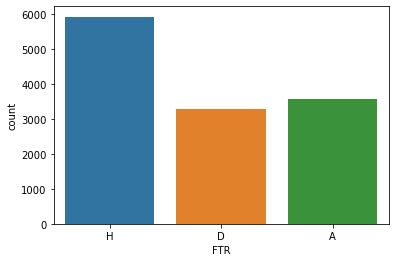

In [16]:
sns.countplot(football_data['FTR'])

In [17]:
football_data['FTR'].value_counts()
#so the dataset is balanced

H    5931
A    3568
D    3283
Name: FTR, dtype: int64

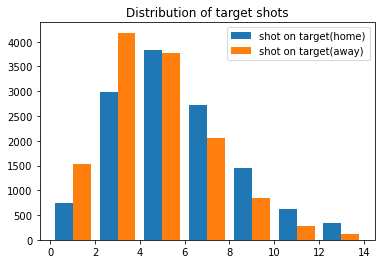

In [18]:
plt.hist([football_data['HST'],football['AST']],bins=[0,2,4,6,8,10,12,14],label=['shot on target(home)', 'shot on target(away)'])
plt.legend(loc='upper right')
plt.title('Distribution of target shots')
plt.show()

## Bi variate analysis

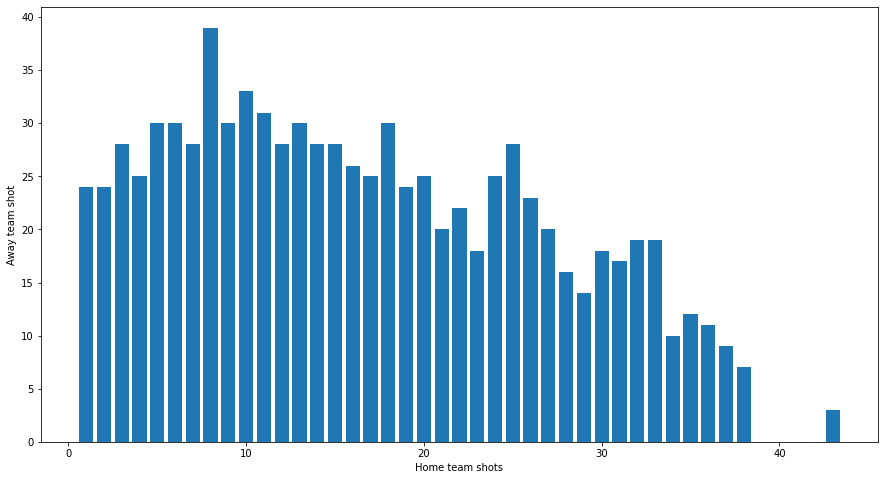

In [19]:

plt.figure(figsize=(15,8))
plt.bar(football_data['HS'],football_data['AS'])

plt.xlabel('Home team shots')
plt.ylabel('Away team shot')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.show()

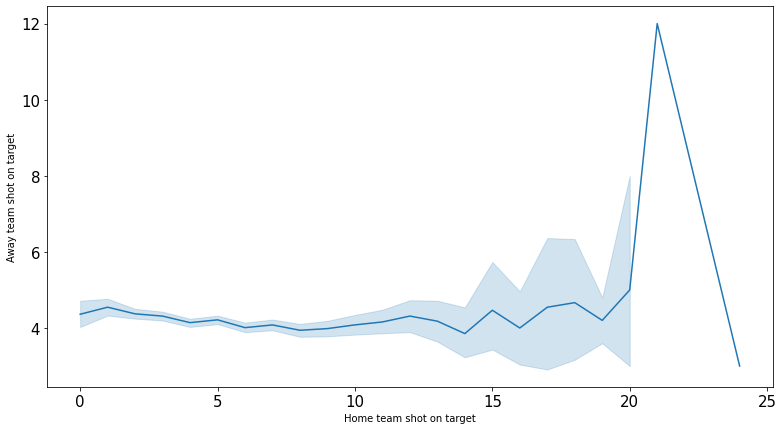

In [20]:
plt.figure(figsize=(13,7))
sns.lineplot(football_data['HST'],football_data['AST'])
plt.xlabel('Home team shot on target')
plt.ylabel('Away team shot on target')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.show()

## Multi variate analysis

In [21]:
#As the model doesnt recognise features having datatype of object.We need
#to convert into numerical column.So we are mapping values of different
#categorical column into numerical values 

In [22]:
football_data['FTR']=football_data['FTR'].map({'H':0,'A':1,'D':2})

In [23]:
correlation=football_data.corr()
correlation

,AC,AF,AR,AS,AST,AY,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,Half_time_goal_difference,precedence
AC,1.000000,-0.086812,-0.059562,0.462510,0.308377,-0.041292,0.000243,-0.210489,-0.011895,0.055087,-0.243891,-0.125377,-0.040859,0.046844,0.056782,0.061044,-0.056558
AF,-0.086812,1.000000,0.066294,-0.090146,-0.139759,0.341632,0.028337,-0.036690,0.259481,0.044719,-0.000256,-0.109941,-0.017968,-0.049478,0.078126,-0.025416,0.045912
AR,-0.059562,0.066294,1.000000,-0.107248,-0.093375,0.030043,-0.070220,0.053015,0.051717,0.085158,0.107248,0.079345,-0.015870,0.052685,0.081130,0.049432,-0.027292
AS,0.462510,-0.090146,-0.107248,1.000000,0.654313,-0.076694,0.079667,-0.251824,0.063347,0.110775,-0.295261,-0.197498,0.129255,0.004731,0.088662,-0.079068,-0.024471
AST,0.308377,-0.139759,-0.093375,0.654313,1.000000,-0.089542,0.128721,-0.133790,-0.035554,0.093094,-0.182743,-0.039242,0.326084,-0.028275,0.038714,-0.229459,0.002898
AY,-0.041292,0.341632,0.030043,-0.076694,-0.089542,1.000000,0.019077,0.030564,0.122789,0.079506,0.037297,-0.017518,-0.024562,-0.011327,0.214518,0.007248,0.018793
FTR,0.000243,0.028337,-0.070220,0.079667,0.128721,0.019077,1.000000,0.031441,0.036699,0.067925,-0.114893,-0.277688,0.170421,-0.353927,0.076757,-0.372847,0.345469
HC,-0.210489,-0.036690,0.053015,-0.251824,-0.133790,0.030564,0.031441,1.000000,-0.133417,-0.062368,0.483544,0.307719,0.040649,-0.068763,-0.063156,-0.077256,0.075578
HF,-0.011895,0.259481,0.051717,0.063347,-0.035554,0.122789,0.036699,-0.133417,1.000000,0.081068,-0.157631,-0.195696,-0.005251,-0.027625,0.364182,-0.017246,0.001031
HR,0.055087,0.044719,0.085158,0.110775,0.093094,0.079506,0.067925,-0.062368,0.081068,1.000000,-0.117234,-0.106180,0.076855,-0.045809,0.054280,-0.083274,0.017902


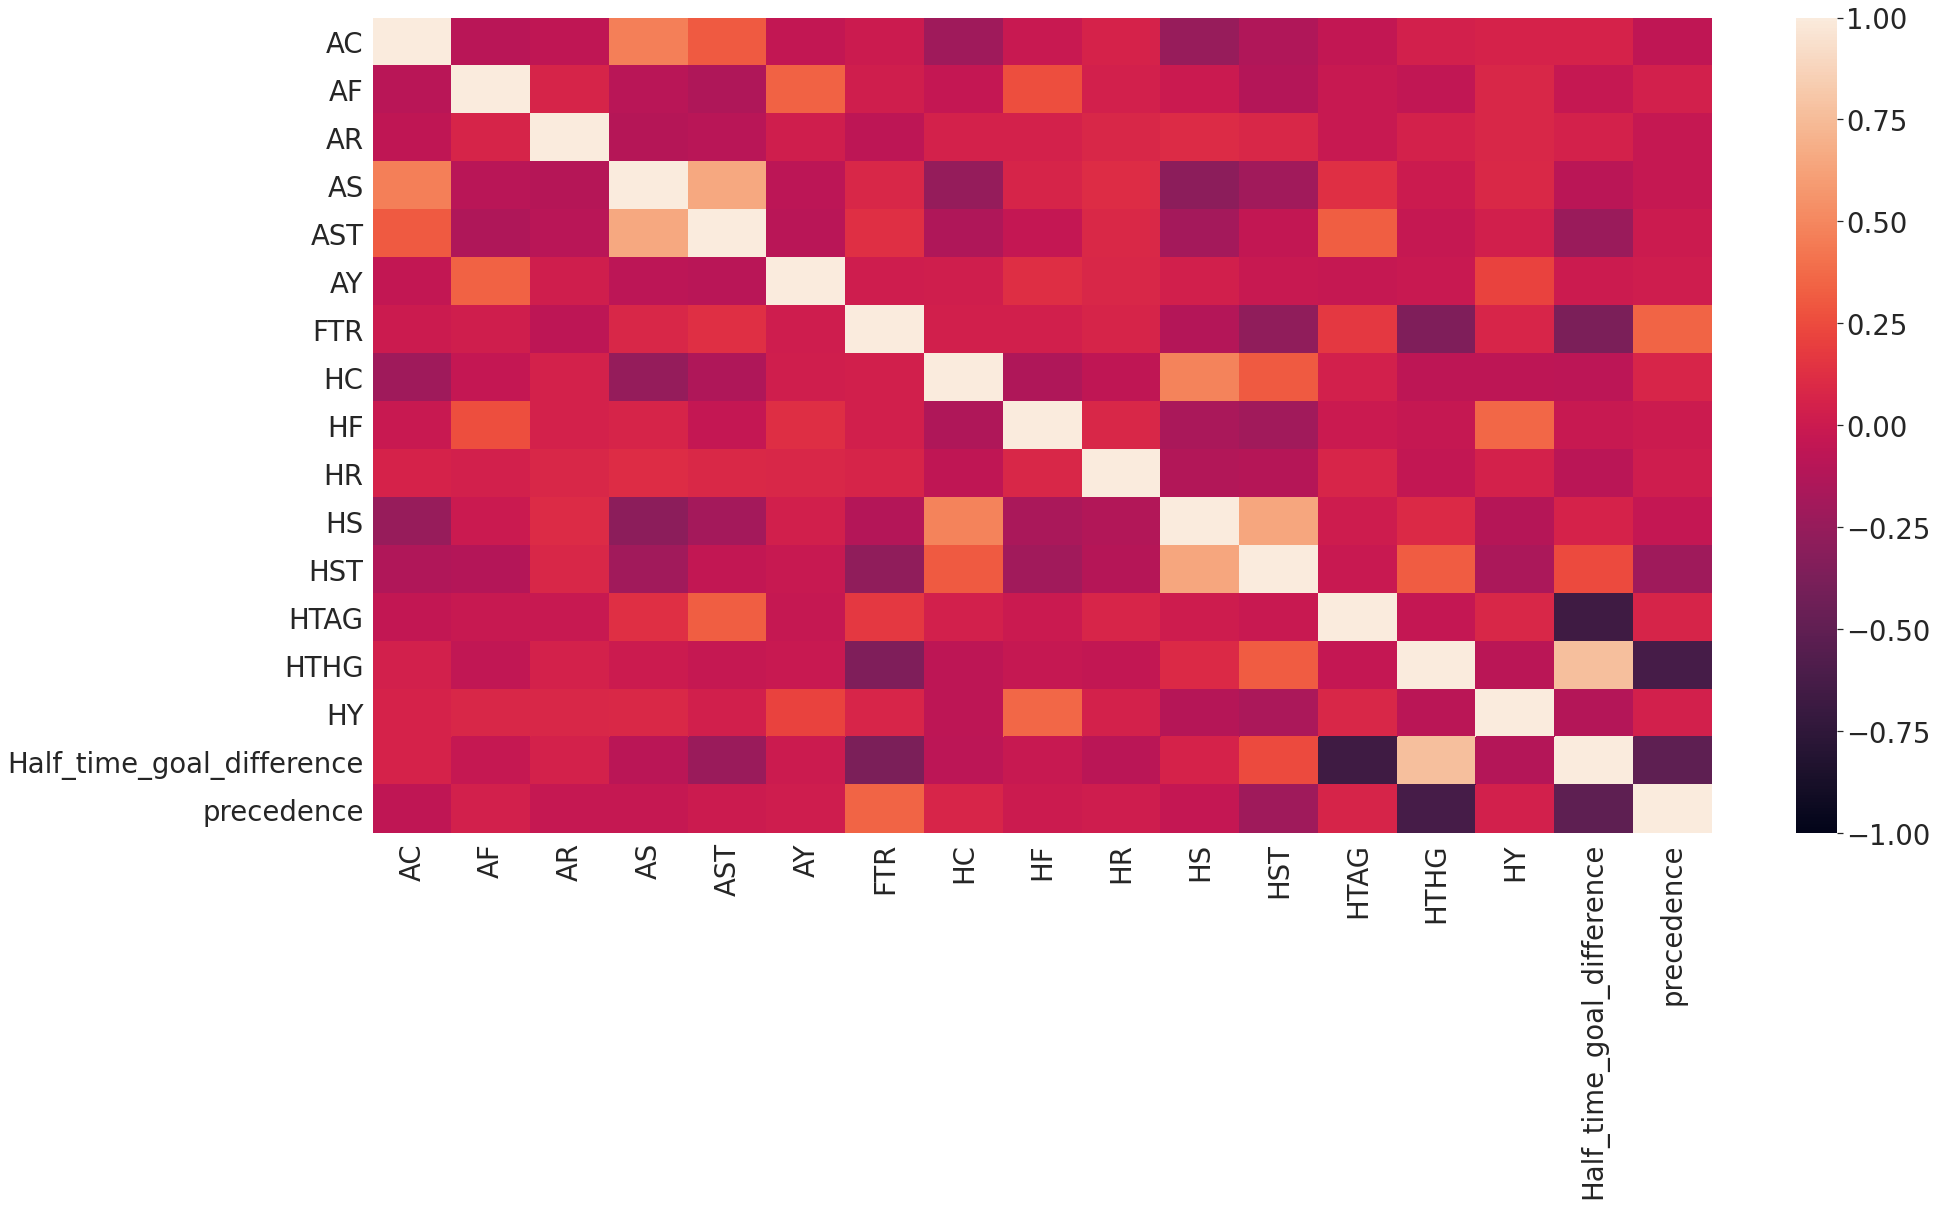

In [24]:
plt.figure(figsize=(30,15))
sns.set(font_scale=2.5)
sns.heatmap(correlation,vmin=-1,vmax=1)
plt.show()

top 3 features with high postive correlation wrt target variable

In [25]:
correlation['FTR'].sort_values(ascending=False).head(4)

FTR           1.000000
precedence    0.345469
HTAG          0.170421
AST           0.128721
Name: FTR, dtype: float64

top 3 features with high negative correlation wrt target variable

In [26]:
correlation['FTR'].sort_values(ascending=True).head(4)

Half_time_goal_difference   -0.372847
HTHG                        -0.353927
HST                         -0.277688
HS                          -0.114893
Name: FTR, dtype: float64

checking for missing values

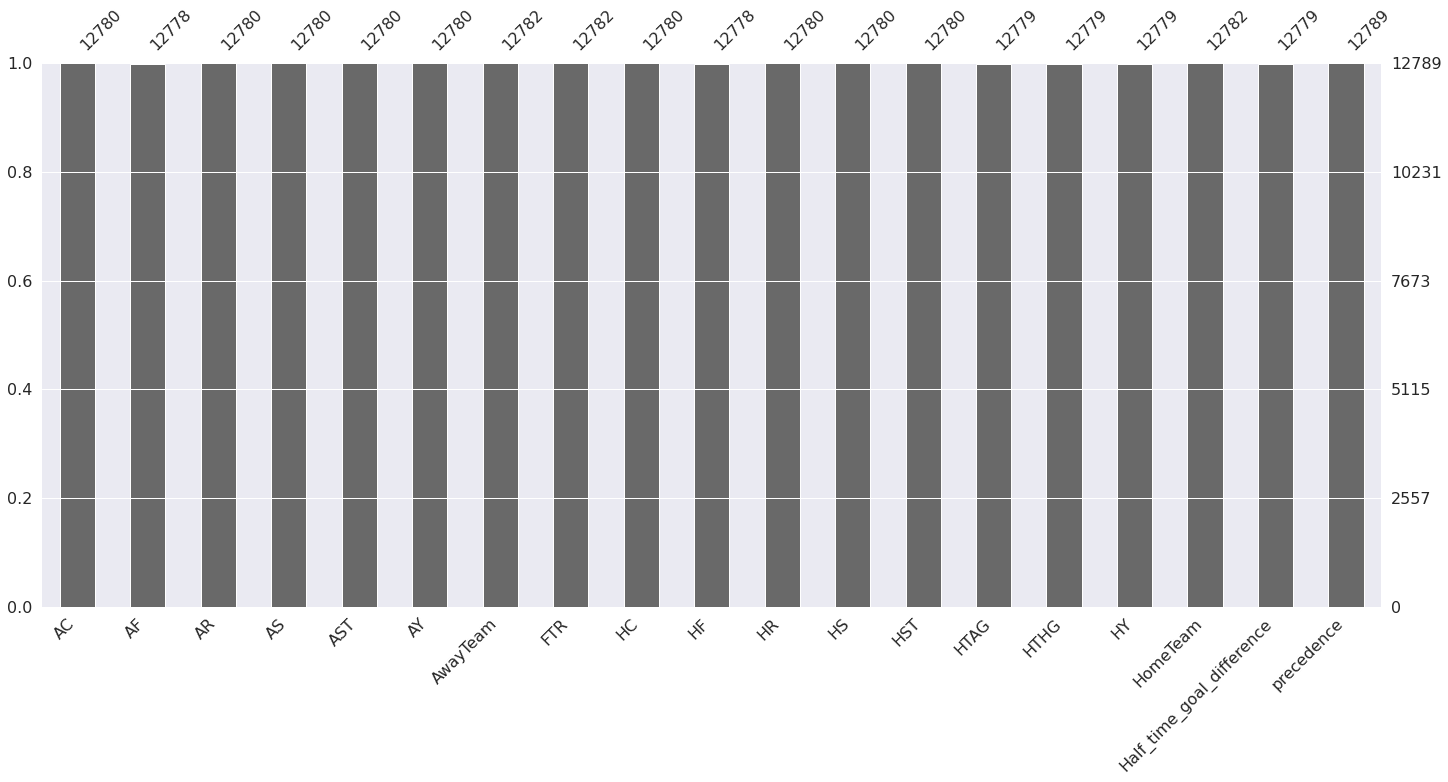

In [27]:
import missingno as msno
msno.bar(football_data)


In [28]:
#checking for correlation between missingness of different variable

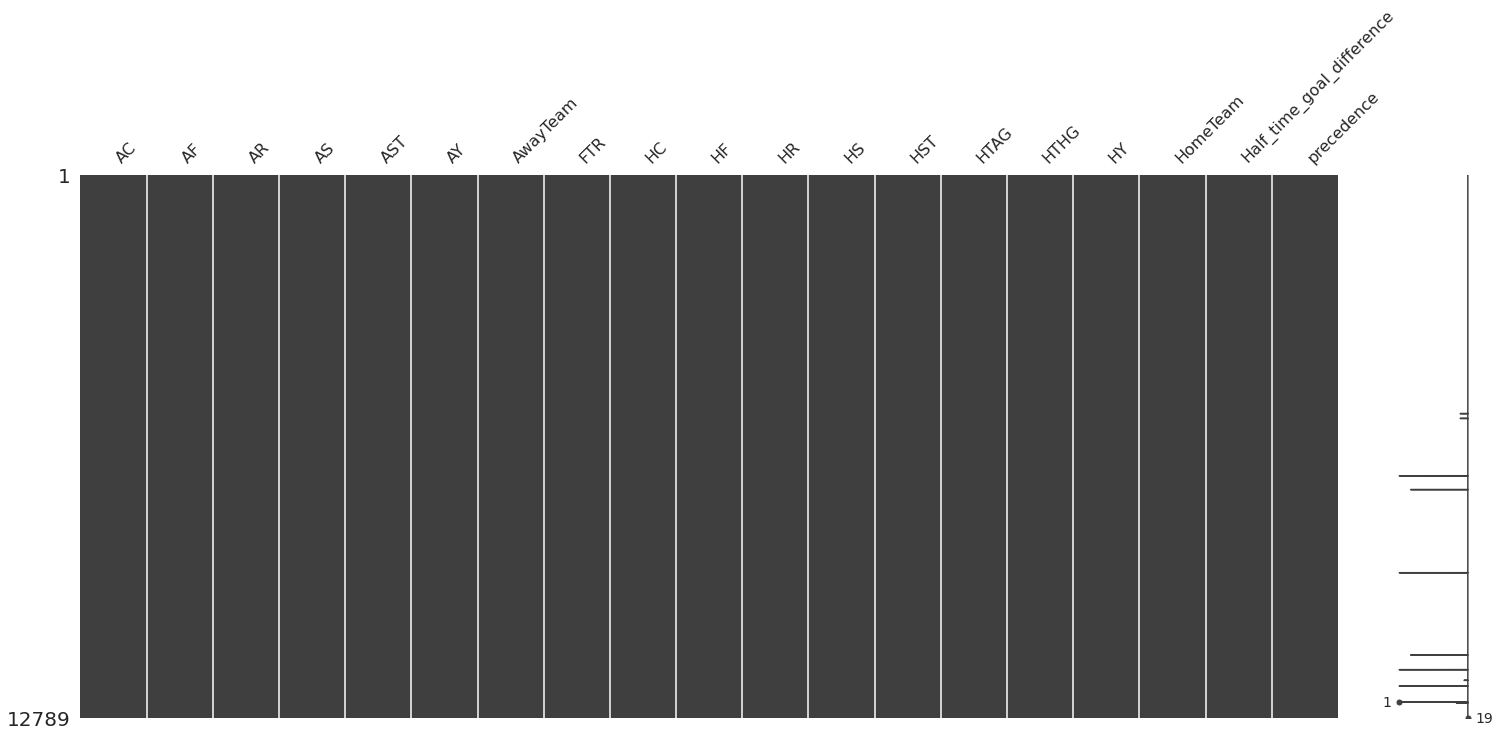

In [29]:
msno.matrix(football_data)

In [30]:
football_data.isna().sum()

AC                            9
AF                           11
AR                            9
AS                            9
AST                           9
AY                            9
AwayTeam                      7
FTR                           7
HC                            9
HF                           11
HR                            9
HS                            9
HST                           9
HTAG                         10
HTHG                         10
HY                           10
HomeTeam                      7
Half_time_goal_difference    10
precedence                    0
dtype: int64

# Preprocessing

## Missing value imputation

Since the dataset doesnt contain too many missing values.Also i didnt
find any relation ship between missingness of different columns.
So iam using mean,mode,median technique for imputing missing values.Also used forward fill method to impute missing values in object column

In [31]:
for x in football_data:
    if football_data[x].dtypes=='float64':
        
        football_data[x]=football_data[x].fillna(football_data[x].mode().max())
    else:
        football_data[x]=football_data[x].fillna(method='ffill')

In [32]:
football_data.isna().sum()

AC                           0
AF                           0
AR                           0
AS                           0
AST                          0
AY                           0
AwayTeam                     0
FTR                          0
HC                           0
HF                           0
HR                           0
HS                           0
HST                          0
HTAG                         0
HTHG                         0
HY                           0
HomeTeam                     0
Half_time_goal_difference    0
precedence                   0
dtype: int64

## Label encoding

In [33]:
#Since the model only recognise numerical values.So we need to convert 
#every string values into numerical datatypes.Here hometeam and away
#team are two object columns.Attributes in one column is also repeating
#in another column

In [34]:
lst=['HomeTeam','AwayTeam']
football_data_object=football_data[lst]

In [35]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
le.fit(football_data_object.stack().unique())

football_data['AwayTeam'] = le.transform(football_data['AwayTeam'])
football_data['HomeTeam'] = le.transform(football_data['HomeTeam'])

# Outliers

In [36]:
#As the linear models affect outliers.So we can replace outliers by 
#IQR method

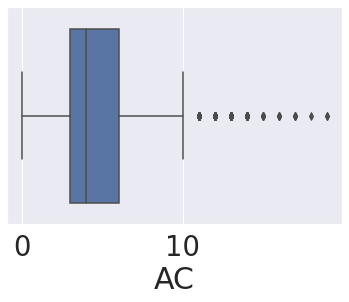

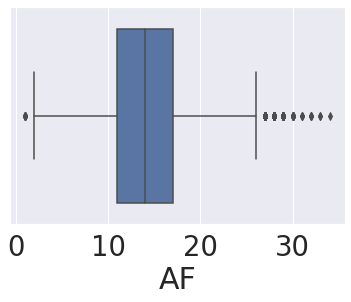

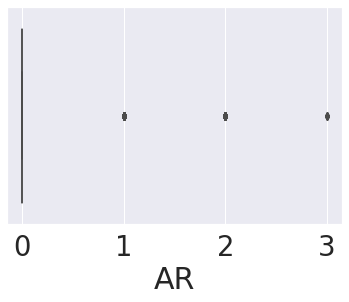

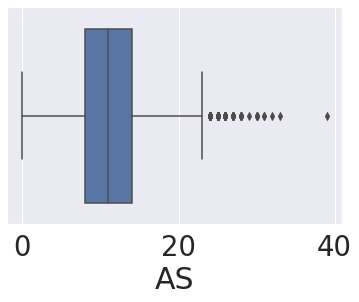

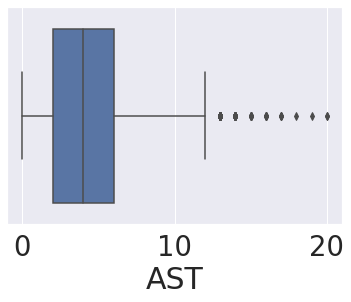

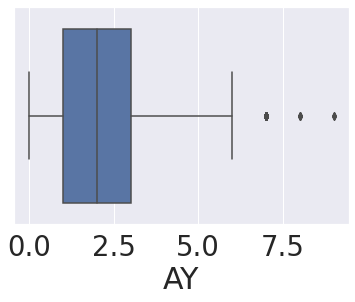

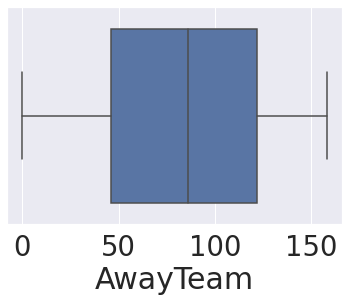

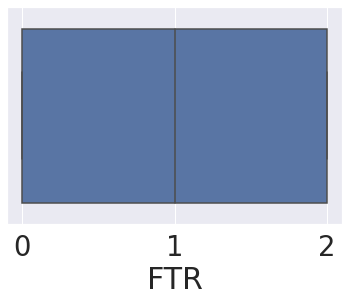

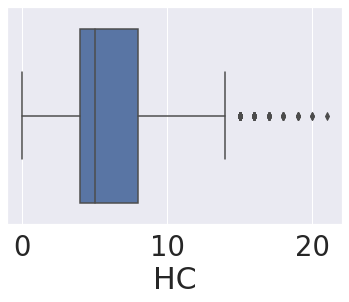

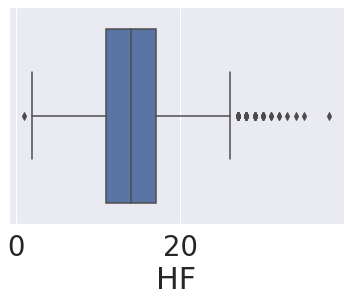

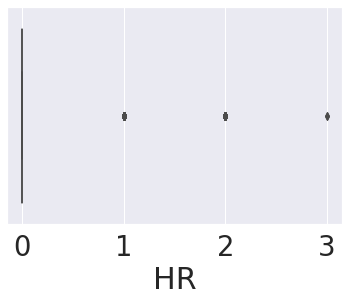

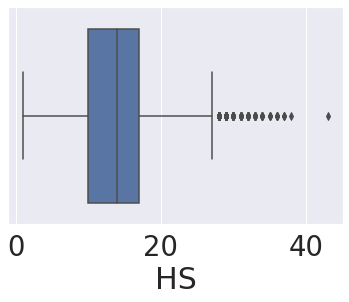

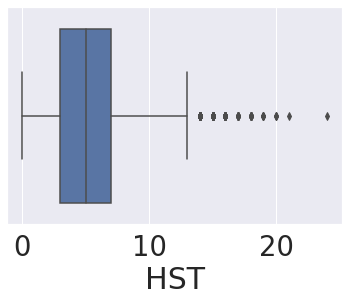

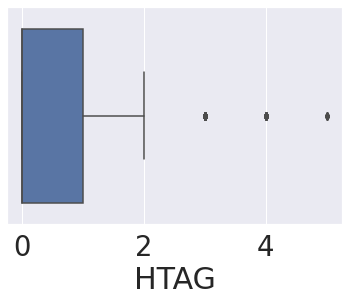

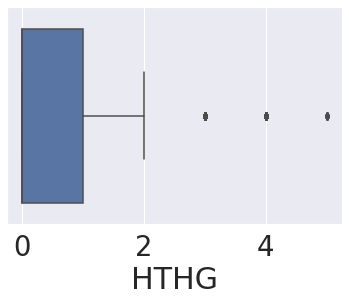

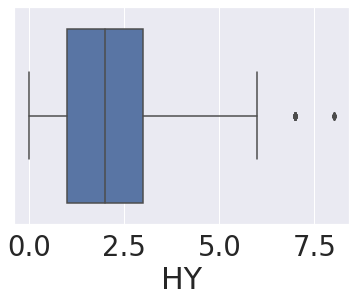

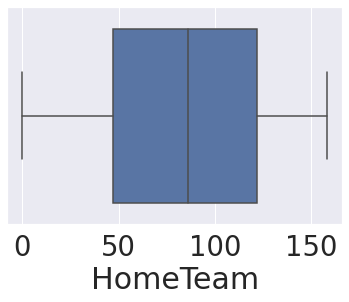

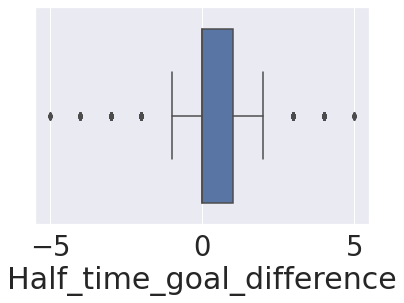

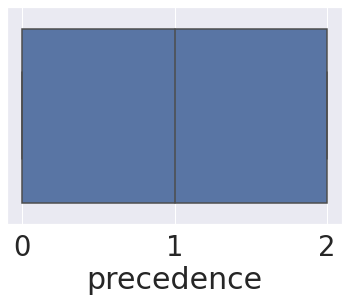

In [37]:
for x in football_data:
    sns.boxplot(football_data[x])
    plt.show()
   

In [38]:
for x in football_data:
   
    descr = football_data[x].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    lower_limit =  descr['25%'] - 1.5 * IQR  
    #outlier replacement
    football_data[x][football_data[x]>upper_limit] = upper_limit
    football_data[x][football_data[x]<lower_limit] = lower_limit

checking outliers

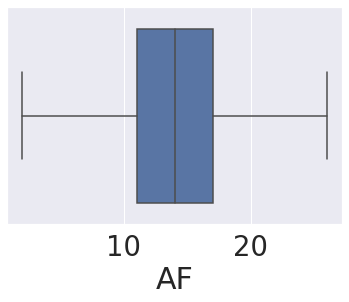

In [39]:
sns.boxplot(football_data['AF'])

In [40]:
#outliers are completely replaced

# test_data_preparation

In [41]:
football_test=pd.read_csv('/home/joseph/Downloads/bstrac/test.csv')
football_test.head()

,index,AC,AF,AR,AS,AST,AY,AwayTeam,Date,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,Referee,league
0,0,5,17,0,19,4,2,Leverkusen,18/08/17,4,13,0,13,8,0,2,1,Bayern Munich,NaN,bundesliga
1,1,7,16,0,13,1,3,Augsburg,19/08/17,3,18,0,11,5,0,1,4,Hamburg,NaN,bundesliga
2,2,1,12,0,9,2,1,Stuttgart,19/08/17,5,18,0,10,3,0,0,2,Hertha,NaN,bundesliga
3,3,4,15,0,11,2,3,Werder Bremen,19/08/17,6,17,0,14,3,0,0,1,Hoffenheim,NaN,bundesliga
4,4,1,14,0,6,2,5,Hannover,19/08/17,13,18,0,14,6,0,0,3,Mainz,NaN,bundesliga


In [42]:
index=football_test[['index']]

In [43]:
index.head()

,index
0,0
1,1
2,2
3,3
4,4


In [44]:
football_test.shape

(1826, 20)

In [45]:
football_test.drop(['index','Date','Referee','league'],axis=1,inplace=True)

In [46]:
football_test['Half_time_goal_difference']=football_test['HTHG']-football_test['HTAG']

In [47]:
football_test['precedence']=0
for x,i in zip(football_test['Half_time_goal_difference'],range(football_test.shape[0])):
    
    if x>0:
        
        football_test['precedence'].loc[i] =0
    elif x<0:
        
        football_test['precedence'].loc[i]=1
    else:
        football_test['precedence'].loc[i]=2
#zero=Repesents home team
#first=Represents away team
#second=Represents draw

In [48]:

for x in football_test:
    if football_test[x].dtypes=='float64':
        football_test[x]=football_test[x].fillna(football_test[x].mode())
    else:
        football_test[x]=football_test[x].fillna(method='ffill')

In [49]:
lst=['HomeTeam','AwayTeam']
football_test_object=football_test[lst]


In [50]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
le.fit(football_test_object.stack().unique())

football_test['AwayTeam'] = le.transform(football_test['AwayTeam'])
football_test['HomeTeam'] = le.transform(football_test['HomeTeam'])

In [51]:
for x in football_test:
    descr = football_test[x].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    lower_limit =  descr['25%'] - 1.5 * IQR  
    #outlier replacement
    football_test[x][football_data[x]>upper_limit] = upper_limit
    football_test[x][football_data[x]<lower_limit] = lower_limit

In [52]:
football_test.isna().sum()

AC                           0
AF                           0
AR                           0
AS                           0
AST                          0
AY                           0
AwayTeam                     0
HC                           0
HF                           0
HR                           0
HS                           0
HST                          0
HTAG                         0
HTHG                         0
HY                           0
HomeTeam                     0
Half_time_goal_difference    0
precedence                   0
dtype: int64

# Modelling

In [53]:
X_train =football_data.drop(['FTR'],axis=1)
Y_train = football_data['FTR']
X_test = football_test

# Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train) #command for training / fitting the model

LogisticRegression()

# K fold cross validation

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=7)
results=cross_val_score(classifier,X_train,Y_train,cv=kfold)
print("Accuracy: {:.2f} %".format(results.mean()*100))

Accuracy: 64.82 %


# Ridge classifier

In [56]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()

In [57]:
from sklearn.model_selection import GridSearchCV #this is used for hyper parameter tuning
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_classifier = GridSearchCV(ridge, parameters)
ridge_classifier.fit(X_train,Y_train)

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [58]:
ridge_classifier.best_params_

{'alpha': 1e-15}

In [59]:
ridge_classifier = RidgeClassifier(alpha=1e-15)
ridge_classifier.fit(X_train,Y_train)

RidgeClassifier(alpha=1e-15)

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=7)
results=cross_val_score(ridge_classifier,X_train,Y_train,cv=kfold)
print("Accuracy: {:.2f} %".format(results.mean()*100))

Accuracy: 65.67 %


# Random forest classifier

In [61]:
#importing Random Forest Classifier from sklearn.ensemble
from sklearn.model_selection import GridSearchCV #GridSearchCV is for parameter tuning
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()
n_estimators=[25,50,75,100,125,150,175,200] #number of decision trees in the forest, default = 100
criterion=['gini','entropy'] #criteria for choosing nodes default = 'gini'
max_depth=[3,5,10] #maximum number of nodes in a tree default = None (it will go till all possible nodes)
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth} #this will undergo 8*2*3 = 48 iterations
RFC_cls = GridSearchCV(cls, parameters)
RFC_cls.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]})

In [62]:
RFC_cls.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}

In [63]:
cls=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=10)

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=7)
results=cross_val_score(cls,X_train,Y_train,cv=kfold)
print("Accuracy: {:.2f} %".format(results.mean()*100))

Accuracy: 65.37 %


# Xg Boost

In [65]:
import xgboost as xgb
classifier = xgb.XGBClassifier()
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 63.53 %


# Naive bayes

In [67]:
#importing Gaussian Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

In [68]:
classifier = GaussianNB()

In [69]:
classifier.fit(X_train,Y_train)


GaussianNB()

In [70]:
kfold = KFold(n_splits=10, random_state=7)
results=cross_val_score(classifier,X_train,Y_train,cv=kfold)
print("Accuracy: {:.2f} %".format(results.mean()*100))

Accuracy: 61.93 %


In [71]:
#ridge classifier is selected as best model

In [72]:
y_pred_ridge=ridge_classifier.predict(X_test)

In [73]:
football_test['FTR']=y_pred_ridge

In [74]:
football_test.head()

,AC,AF,AR,AS,AST,AY,AwayTeam,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,Half_time_goal_difference,precedence,FTR
0,5,17,0,19,4.0,2,50.0,4,13.0,0,13,8.0,0,2,1,146.5,2,0,0.0
1,7,16,0,13,1.0,3,7.0,13,18.0,0,11,10.5,0,1,4,37.0,1,0,0.0
2,1,12,0,9,2.0,1,83.0,5,18.0,0,10,3.0,0,0,2,39.0,0,2,2.0
3,4,25,0,11,2.0,3,94.0,6,17.0,0,14,3.0,0,0,1,40.0,0,2,2.0
4,1,25,0,6,2.0,5,38.0,13,18.0,0,14,6.0,0,0,3,55.0,0,2,2.0


In [81]:
data=pd.concat([football_test,index],axis=1)

In [82]:
final_data=data[['index','FTR']]

In [83]:
final_data

,index,FTR
0,0,0.0
1,1,0.0
2,2,2.0
3,3,2.0
4,4,2.0
...,...,...
1821,375,0.0
1822,376,0.0
1823,377,1.0
1824,378,0.0


In [84]:
final_data['FTR']=final_data['FTR'].map({0:'H',1:'A',2:'D'})

In [86]:
final_data.head(15)

,index,FTR
0,0,H
1,1,H
2,2,D
3,3,D
4,4,D
5,5,H
6,6,A
7,7,D
8,8,H
9,9,A


In [89]:
final_data.to_csv('/home/joseph/Downloads/bstrac/ridge.csv')